<a href="https://colab.research.google.com/github/ioloi1128/CDA/blob/main/CDA_Holly_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install xarray
!pip install matplotlib
!pip install scipy
!pip install pandas

#!apt-get install libproj-dev proj-data proj-bin
#!apt-get install libgeos-dev
#!pip install cython
#!pip install cartopy

#!apt-get -V -y -qq install python-cartopy python3-cartopy
#!pip uninstall shapely -y
#!pip install shapely --no-binary shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import plotly.express as px
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
#import cartopy.crs as ccrs
#import cartopy.mpl.ticker as cticker
#from cartopy.util import add_cyclic_point
#from matplotlib import pyplot as plt
#import scipy as stats
from scipy.stats import ttest_ind_from_stats
import csv
#import netCDF4 as nc
import cftime
import sys
import os
import urllib.request
import io
#import scipy.stats
from io import StringIO



<class 'pandas.core.frame.DataFrame'>


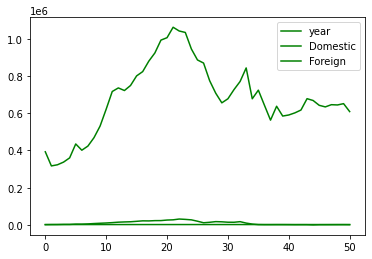

In [ ]:
con = pd.read_csv('/content/drive/MyDrive/Colab_data/TPconsump.csv')
con02 = con.squeeze()
print(type(con02))

# print(con02)
con02.plot.line(color='green')
# con03=con02.to_numpy()
con03=con02.to_xarray() #轉成xr Dataset而已
con04=con03.set_coords('year') #將year放到Coordinates
# con05=con04.set_coords('Domestic') #將year放到Coordinates


# print(con03)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# con05
con05=con04.drop_vars('Domestic', errors='raise')#拿掉一個變數
con05
con06=con05.to_array(dim='Foreign', name=None) 
# con06.reset_coords(names='Foreign', drop=True)
con06
newCon=con06.values

In [ ]:
# 建立一個列表儲存60年資料的url
file_tavg = []
for year in range(1960,2019):
  fn = os.path.join("http://140.109.172.135/~dadm/data_share/tccip/temp/1km/nc/","tavg." + str(year) + ".monthly.1km-grid-v4.nc" )
  file_tavg.append(fn)

In [ ]:
# 透過爬蟲下載60年的nc資料放進列表中
hadv_new = []
for i in range(len(file_tavg)):
 req = urllib.request.Request(file_tavg[i])
 with urllib.request.urlopen(req) as resp:
  xadv = xr.open_dataset(io.BytesIO(resp.read()), decode_times=False)
  hadv_new.append(xadv)
# 合併60年的資料
xadv60 = xr.concat(hadv_new, dim="time")

In [ ]:
# 建立1960-2018的時間列表
time=pd.date_range(start='1960-01',end='2018-12',freq='MS')
xadv60.coords['time'] = time
xadv60.coords

Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2018-12-01
  * lat      (lat) float32 21.5 21.51 21.52 21.53 ... 25.47 25.48 25.49 25.5
  * lon      (lon) float32 119.2 119.2 119.2 119.2 ... 122.3 122.3 122.3 122.3

In [ ]:
# 根據經緯度篩選資料
xadv60tas=xadv60.tas.sel(lat=slice(24.59,25.091080),lon=slice(121.3,121.5598))
# (lat=slice(-15,15),lon=slice(180,180+90)
# 根據時間區間篩選資料
xadv60tas6018=xadv60tas.sel(time=slice('1968-01-01', '2018-12-01'))


In [ ]:
# 得到年平均tas並視覺化
val_yr=xadv60tas6018.groupby('time.year').mean(dim='time')

# print(val_yr01)
# print(type(val_yr01))
# val_yr02 = val_yr.to_series()
# val_yr02.plot.line(color='purple')
val_yr.reset_coords(names=None, drop=False)
val_yr

<xarray.DataArray 'tas' (year: 51, lat: 60, lon: 31)>
array([[[14.738458 , 15.580711 , 15.680508 , ..., 19.698128 ,
         17.396368 , 16.172768 ],
        [16.096243 , 14.9421015, 13.801631 , ..., 19.906225 ,
         18.747665 , 19.038237 ],
        [15.525561 , 16.116945 , 13.672528 , ..., 20.727442 ,
         20.129179 , 19.63832  ],
        ...,
        [21.17287  , 20.997057 , 21.043495 , ..., 21.968573 ,
         21.984781 , 22.028452 ],
        [21.485071 , 21.435324 , 21.325289 , ..., 21.947678 ,
         21.905212 , 22.003271 ],
        [21.453278 , 21.109743 , 21.101942 , ..., 21.601896 ,
         21.565138 , 21.718225 ]],

       [[15.311507 , 16.156626 , 16.254566 , ..., 20.40051  ,
         18.576645 , 17.154978 ],
        [16.607782 , 15.514553 , 14.347018 , ..., 20.54039  ,
         19.715746 , 19.916801 ],
        [16.075933 , 16.68735  , 14.212643 , ..., 21.03251  ,
         20.783209 , 20.348227 ],
...
        [22.696936 , 22.518715 , 22.564508 , ..., 23.751518 ,
         23.748405 , 23.745338 ],
        [23.048393 , 22.996527 , 22.880262 , ..., 23.854391 ,
         23.769026 , 23.723902 ],
        [23.022367 , 22.66744  , 22.559357 , ..., 23.609606 ,
         23.397284 , 23.524225 ]],

       [[16.831667 , 17.62446  , 17.718767 , ..., 19.952047 ,
         17.67312  , 16.04723  ],
        [17.945593 , 17.01195  , 16.073624 , ..., 20.138353 ,
         18.95829  , 19.244894 ],
        [17.48417  , 17.931387 , 15.97303  , ..., 21.089956 ,
         20.403818 , 19.896544 ],
        ...,
        [22.422602 , 22.226    , 22.35785  , ..., 23.879995 ,
         23.76209  , 23.746696 ],
        [22.913263 , 22.861084 , 22.68001  , ..., 23.902182 ,
         23.696127 , 23.7621   ],
        [22.88804  , 22.472939 , 22.356943 , ..., 23.550934 ,
         23.422571 , 23.54331  ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 24.6 24.6 24.61 24.62 ... 25.06 25.07 25.08 25.09
  * lon      (lon) float32 121.3 121.3 121.3 121.3 ... 121.5 121.5 121.5 121.6
  * year     (year) int64 1968 1969 1970 1971 1972 ... 2014 2015 2016 2017 2018

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab_data/TPconsump.csv', header=0, sep=',')
print(df)

    year  Domestic  Foreign
0   1968    392990     1301
1   1969    316995     1791
2   1970    323170     1974
3   1971    337500     2725
4   1972    360229     2772
5   1973    434945     4425
6   1974    401367     4341
7   1975    423579     5474
8   1976    468783     7366
9   1977    531057     8932
10  1978    621739    10390
11  1979    716892    12323
12  1980    736044    14753
13  1981    722094    15992
14  1982    749011    16946
15  1983    800679    19337
16  1984    823638    21885
17  1985    879612    21491
18  1986    923863    23039
19  1987    992990    23258
20  1988   1005927    26148
21  1989   1062078    27382
22  1990   1041849    31621
23  1991   1034170    29746
24  1992    945193    27228
25  1993    886331    19856
26  1994    869693    11615
27  1995    774850    14122
28  1996    707627    17700
29  1997    655902    16680
30  1998    677712    14520
31  1999    727061    14305
32  2000    770655    17490
33  2001    843412     9817
34  2002    677769  

In [ ]:
df_for = df.Foreign
df_for1 = df_for.to_xarray()


In [65]:
#Method I: xarray
#r_map=xr.corr(con06,val_yr,dim='year')
r_map=xr.corr(df_for1,val_yr[:,:,:],dim='year')
r_map


<xarray.DataArray (index: 51, lat: 60, lon: 31)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * index    (index) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * lat      (lat) float32 24.6 24.6 24.61 24.62 ... 25.06 25.07 25.08 25.09
  * lon      (lon) float32 121.3 121.3 121.3 121.3 ... 121.5 121.5 121.5 121.6

In [ ]:
print(con06)

<xarray.DataArray (Foreign: 1, index: 51)>
array([[ 1301,  1791,  1974,  2725,  2772,  4425,  4341,  5474,  7366,
         8932, 10390, 12323, 14753, 15992, 16946, 19337, 21885, 21491,
        23039, 23258, 26148, 27382, 31621, 29746, 27228, 19856, 11615,
        14122, 17700, 16680, 14520, 14305, 17490,  9817,  4578,  1729,
         1284,  1318,  1475,  1427,  1283,   999,  1129,  1068,    15,
         1018,  1056,  1190,  1293,  1342,  1137]])
Coordinates:
  * index    (index) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
    year     (index) int64 1968 1969 1970 1971 1972 ... 2014 2015 2016 2017 2018
  * Foreign  (Foreign) <U7 'Foreign'


In [ ]:
from scipy.stats import pearsonr

In [82]:
nx=len(val_yr['lon']) #所以需要寫迴圈去讓他算
ny=len(val_yr['lat'])

p_array=np.zeros((ny,nx))
r_array=np.zeros((ny,nx))


for i in range(nx):
    for j in range(ny):
        #print(val_yr[:,j,i])
        #print(newCon)
        r,p=pearsonr(df_for,val_yr[:,j,i])
        r_array[j,i]=r
        p_array[j,i]=p
r_array.shape

(60, 31)

In [84]:
r_array

array([[0.23747445, 0.20318978, 0.19417364, ..., 0.19643684, 0.26558962,
        0.29367209],
       [0.1979195 , 0.22965367, 0.29326939, ..., 0.18357836, 0.21291576,
        0.20824704],
       [0.19464287, 0.16971111, 0.29812035, ..., 0.12330867, 0.16667364,
        0.18917892],
       ...,
       [0.06496517, 0.06176977, 0.06935029, ..., 0.04983456, 0.05554572,
        0.05635995],
       [0.07152598, 0.0720042 , 0.07289198, ..., 0.04471033, 0.0463969 ,
        0.05100992],
       [0.07322158, 0.07443407, 0.07053357, ..., 0.03812139, 0.04069234,
        0.04493551]])

In [85]:
p_array

array([[0.09335462, 0.15270026, 0.17214776, ..., 0.16710541, 0.05961198,
        0.03647344],
       [0.16386091, 0.10498633, 0.03674299, ..., 0.19722387, 0.13359189,
        0.14252748],
       [0.17109336, 0.23381328, 0.03360308, ..., 0.38865145, 0.24241256,
        0.18366436],
       ...,
       [0.65060534, 0.66675926, 0.62869464, ..., 0.72837877, 0.69865193,
        0.69444887],
       [0.6179386 , 0.61558491, 0.6112256 , ..., 0.75539336, 0.74646803,
        0.72222686],
       [0.60961049, 0.60368506, 0.62283516, ..., 0.79055616, 0.77678245,
        0.75419988]])

In [67]:
print(newCon)

[[ 1301  1791  1974  2725  2772  4425  4341  5474  7366  8932 10390 12323
  14753 15992 16946 19337 21885 21491 23039 23258 26148 27382 31621 29746
  27228 19856 11615 14122 17700 16680 14520 14305 17490  9817  4578  1729
   1284  1318  1475  1427  1283   999  1129  1068    15  1018  1056  1190
   1293  1342  1137]]


In [69]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=r_map
data,lon=add_cyclic_point(r_map,coord=val_yr['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,val_yr['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='PiYG',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between Nino3.4 and Precipitation Anomalies')

NameError: ignored

<Figure size 792x612 with 0 Axes>

In [ ]:
from pylab import rcParams

fig01=px.bar(val_yr02,x=val_yr02.index,y='tas',color='tas',width=700, height=400,
           color_continuous_scale=px.colors.diverging.Tealrose,title="台北年平均溫",labels={
                     "val_yr02": "年分",
                     "tas": "年平均溫 (degC)",
                 },)
px.colors.carto.swatches


fig01.show()

In [ ]:
fig02=px.bar(con02,x='year',y='Domestic',color='Domestic',width=700, height=400,
           color_continuous_scale=px.colors.diverging.Earth,title="台菸公司台北市酒類銷量-國產",labels={
                     "year": "年分",
                     "Domestic": "北市國產酒銷量",
                 },)
px.colors.carto.swatches


fig02.show()

In [ ]:
fig02=px.bar(con02,x='year',y='Foreign',color='Foreign',width=700, height=400,
           color_continuous_scale=px.colors.diverging.Earth,title="台菸公司台北市酒類銷量-進口",labels={
                     "year": "年分",
                     "Foreign": "北市進口酒銷量",
                 },)
px.colors.carto.swatches


fig02.show()

In [ ]:
val_yr02.plot.line(color='purple',marker='^')

# 
con03=con02.plot(x='year',y='Domestic',color='green')
con04=con02.plot(x='year',y='Foreign',color='red')
plt.legend(title='Origin')
# plt.legend()


# con02.plot.line()

# plt.figure(figsize=(6,3.5 ), dpi=100)
# con03=plt.plot(con02['Foreign'], label='Foreign')
# con03=plt.plot(con02['Domestic'], label='Domestic')
# plt.legend(title='Origin') #圖說標題
# plt.ylabel('Sales volume', fontsize=11)
# plt.xlabel('year', fontsize=11)
# plt.title('hello', fontsize=16)
# plt.show()
#


In [ ]:
plt.scatter(val_yr02,con02['Domestic'], s=10, color="green")


In [ ]:
scipy.stats.shapiro(val_yr02)

In [ ]:
scipy.stats.shapiro(con02['Domestic'])

In [ ]:
R=np.corrcoef(val_yr02,con02['Domestic'])
R

In [ ]:
corr=R[0,1]
corr

In [ ]:
#scipy correlation function 
(rvalue, pvalue) =  scipy.stats.spearmanr(val_yr02,con02['Domestic'])
rvalue

In [ ]:
scipy.stats.spearmanr(val_yr02,con02['Domestic'])

In [ ]:
pvalue

In [ ]:
plt.plot(val_yr02,val_yr02,'b')
plt.plot(con02['year'],con02['Domestic'],'r')
plt.legend(['tas','consumption (EQ,180)'])

rvalue_2 = round(rvalue, 2)
stuff_in_string = f"R= {rvalue_2}*"

#print(stuff_in_string)
plt.title(stuff_in_string,loc='right')

In [ ]:
plt.scatter(val_yr02,con02['Domestic'], s=10, color="blue")
plt.title(stuff_in_string,loc='right')

m, b = np.polyfit(val_yr02,con02['Domestic'], 1)
plt.plot(val_yr02, m*val_yr02 + b, color="orange",linewidth=2)
plt.xlabel("Temperature")
plt.ylabel("Domestic consumption")

plt.show()

In [ ]:
plt.scatter(val_yr02,con02['Foreign'], s=10, color="purple")


In [ ]:
R=np.corrcoef(val_yr02,con02['Foreign'])
R

In [ ]:
corr=R[0,1]
corr

In [ ]:
#scipy correlation function 
(rvalue, pvalue) =  scipy.stats.spearmanr(val_yr02,con02['Foreign'])
rvalue

In [ ]:
pvalue

In [ ]:
plt.plot(val_yr02,val_yr02,'b')
plt.plot(con02['year'],con02['Foreign'],'r')
plt.legend(['tas','consumption (EQ,180)'])

rvalue_2 = round(rvalue, 2)
stuff_in_string = f"R= {rvalue_2}*"

#print(stuff_in_string)
plt.title(stuff_in_string,loc='right')

In [ ]:
plt.scatter(val_yr02,con02['Foreign'], s=10, color="purple")
plt.title(stuff_in_string,loc='right')

m, b = np.polyfit(val_yr02,con02['Foreign'], 1)
plt.plot(val_yr02, m*val_yr02 + b, color="orange",linewidth=2)
plt.xlabel("Temperature")
plt.ylabel("Foreign consumption")

plt.show()

In [ ]:
scipy.stats.spearmanr(val_yr02,con02['Foreign'])